In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# **Predict Students' Dropout and Academic Success '**

In [ ]:
df = pd.read_csv('/content/transfusion.data')
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(533, 5)

In [ ]:
df.dropna(inplace=True)
df.shape

(533, 5)

In [ ]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()
X , y

(array([[    2,    50, 12500,    98],
        [    0,    13,  3250,    28],
        [    1,    16,  4000,    35],
        ...,
        [   23,     3,   750,    62],
        [   39,     1,   250,    39],
        [   72,     1,   250,    72]]),
 array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 

In [ ]:
scaler = sk.preprocessing.StandardScaler()
#X_train = scaler.fit_transform(X_train)

In [ ]:
X_train , X_temp = sk.model_selection.train_test_split(X , test_size=0.2 , random_state=42)
y_train , y_temp = sk.model_selection.train_test_split(y , test_size=0.2 , random_state=42)
X_train.shape , X_temp.shape

((426, 4), (107, 4))

In [ ]:
X_test , X_valid = sk.model_selection.train_test_split(X_temp , test_size=0.5 , random_state=42)
y_test , y_valid = sk.model_selection.train_test_split(y_temp , test_size=0.5 , random_state=42)
X_test.shape , y_test.shape

((53, 4), (53,))

***K nearest neighbors***

In [ ]:
def best_param_for_KNN(min , max_neighbors):
  neighbors = np.linspace(min , max_neighbors , 2).astype('int')

  best_score = 0
  best_param = 0

  for n in neighbors:
    KNN_model = sk.neighbors.KNeighborsClassifier(n_neighbors=int(n))
    KNN_model.fit(X_train , y_train)
    y_pred = KNN_model.predict(X_valid)
    score = sk.metrics.accuracy_score(y_valid , y_pred)
    if score > best_score:
      best_score = score
      best_param = n
  return best_param

In [ ]:
n = best_param_for_KNN(15,25)
n

25

In [ ]:
KNN_model = sk.neighbors.KNeighborsClassifier(n)
KNN_model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred = KNN_model.predict(X_test)

In [ ]:
print(f' The model got predict {np.sum(y_pred != y_test)} false for {X_test.shape[0]} instance')

 The model got predict 8 false for 53 instance


In [ ]:
print(sk.metrics.classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        45
           1       0.00      0.00      0.00         8

    accuracy                           0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

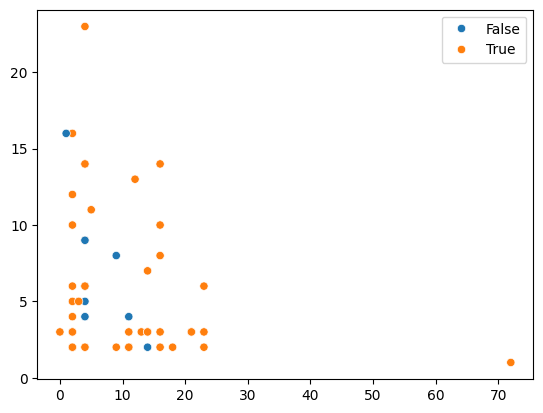

In [ ]:
y_anal = (y_pred == y_test)
sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_anal)

**Naive bayes**

In [ ]:
naive_bayes_model = sk.naive_bayes.GaussianNB()

In [ ]:
naive_bayes_model.fit(X_train , y_train)

GaussianNB()

In [ ]:
y_pred = naive_bayes_model.predict(X_test)

In [ ]:
print(sk.metrics.classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        45
           1       0.20      0.12      0.15         8

    accuracy                           0.79        53
   macro avg       0.53      0.52      0.52        53
weighted avg       0.76      0.79      0.77        53



In [ ]:
print(f'{np.sum(y_pred != y_test)} wrong value in {X_test.shape[0]} value')

11 wrong value in 53 value


<Axes: >

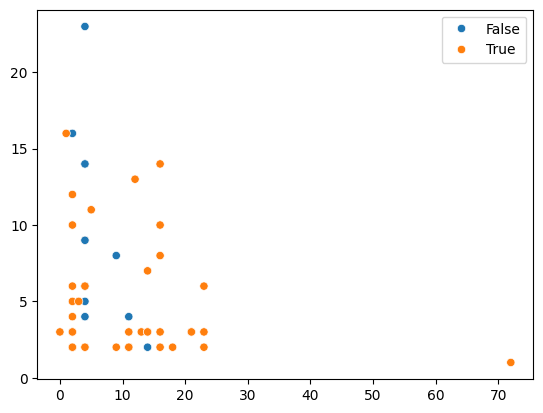

In [ ]:
y_anal = (y_pred == y_test)
sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_anal)

**Logistic Reagression**

In [ ]:
logistic_regression_model = sk.linear_model.LogisticRegression()

In [ ]:
logistic_regression_model.fit(X_train , y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_regression_model.predict(X_test)

In [ ]:
print(f'{np.sum(y_pred != y_test)} wrong value in {X_test.shape[0]} value')

10 wrong value in 53 value


In [ ]:
print(sk.metrics.classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        45
           1       0.25      0.12      0.17         8

    accuracy                           0.81        53
   macro avg       0.55      0.53      0.53        53
weighted avg       0.77      0.81      0.78        53



<Axes: >

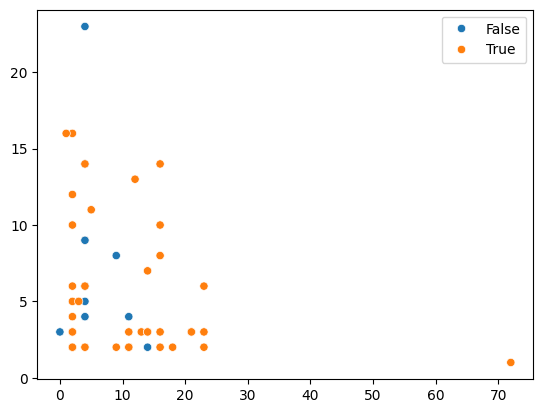

In [ ]:
y_anal = (y_pred == y_test)
sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_anal)

In [ ]:
svm_model = sk.svm.SVC()

In [ ]:
svm_model.fit(X_train , y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
print(f'{np.sum(y_pred != y_test)} wrong value in {X_test.shape[0]} value')

8 wrong value in 53 value


In [ ]:
print(sk.metrics.classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        45
           1       0.00      0.00      0.00         8

    accuracy                           0.85        53
   macro avg       0.42      0.50      0.46        53
weighted avg       0.72      0.85      0.78        53



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

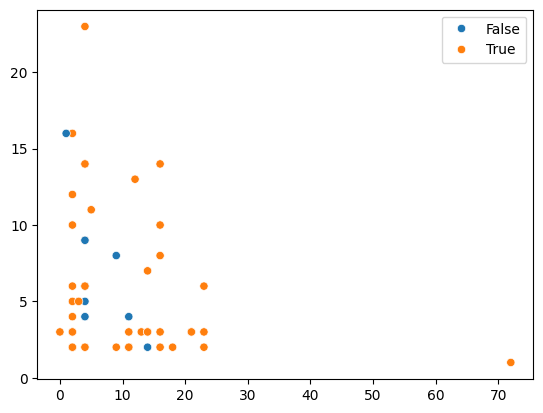

In [ ]:
y_anal = (y_pred == y_test)
sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_anal)

# **Regression Combined Cycle Power Plant**

In [ ]:
df = pd.read_excel('/content/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [ ]:
df.shape

(9568, 5)

In [ ]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()
X.shape , y.shape

((9568, 4), (9568,))

In [ ]:
scaler = sk.preprocessing.StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X.shape , y.shape

((9568, 4), (9568,))

In [ ]:
X_train , X_temp = sk.model_selection.train_test_split(X , test_size=0.2 , random_state=42)
y_train , y_temp = sk.model_selection.train_test_split(y , test_size=0.2 , random_state=42)

In [ ]:
X_test , X_valid = sk.model_selection.train_test_split(X_temp , test_size=0.2 , random_state=42)
y_test , y_valid = sk.model_selection.train_test_split(y_temp , test_size=0.2 , random_state=42)

**Linear regression**

In [ ]:
linear_regression_model = sk.linear_model.LinearRegression()

In [ ]:
linear_regression_model.fit(X_train , y_train)

LinearRegression()

In [ ]:
y_pred = linear_regression_model.predict(X_test)

In [ ]:
print(sk.metrics.mean_absolute_error(y_pred , y_test)) #lower_ better
print(sk.metrics.mean_squared_error(y_pred , y_test)) #lower better

3.5915643103224806
20.333972230787563


In [ ]:
X_test , y_test

(array([[ 1.52692444,  1.57581141, -0.28779757, -0.67529531],
        [ 0.42924488,  0.45440248,  0.80675984, -0.42391694],
        [-0.03371288,  0.81246638,  1.19911657,  0.53364972],
        ...,
        [ 1.32027083,  1.21223883, -0.65994708, -1.16161315],
        [-0.68185374, -2.23697896, -0.73067233, -0.28418618],
        [-1.29778884, -1.00460957,  1.08460903,  0.51241612]]),
 array([429.35, 452.5 , 453.84, ..., 440.99, 464.11, 480.26]))

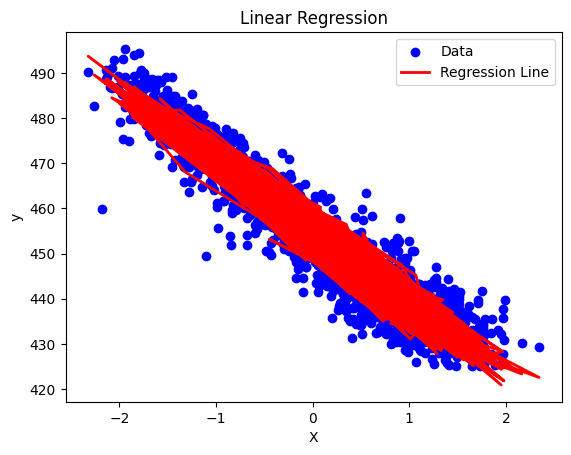

In [ ]:
plt.scatter(x=X_test[:,0],y= y_test, color='blue', label='Data')
#x= np.linspace(np.min(X_train),np.max(X_train),y_pred.shape[0])
plt.plot(X_test[:,0], y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

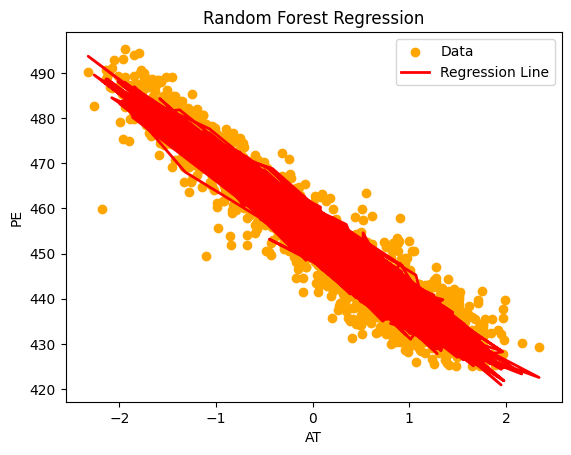

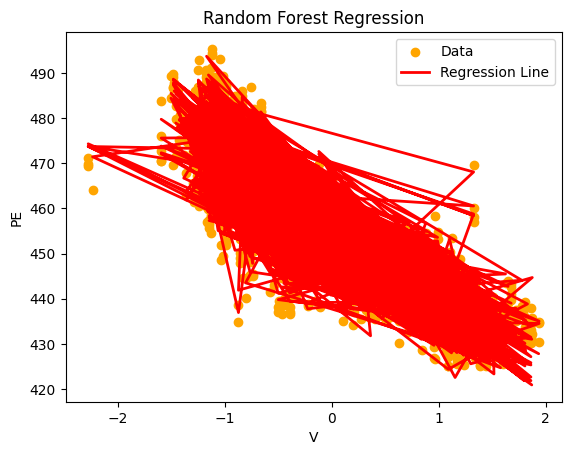

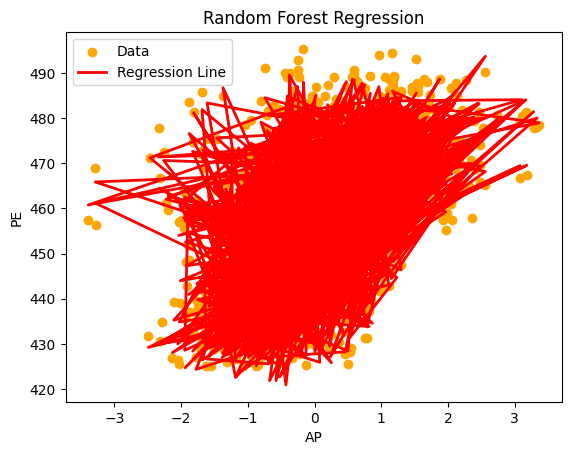

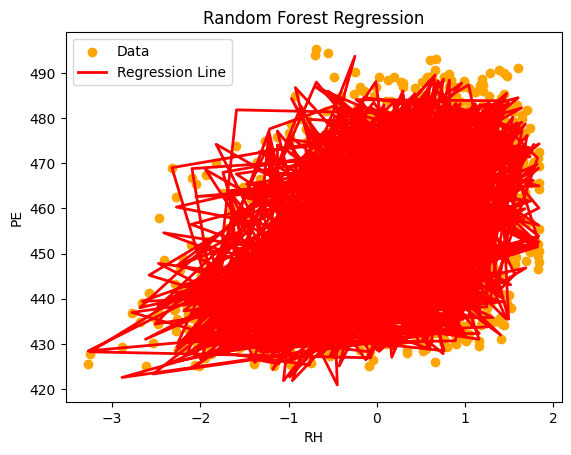

In [ ]:
for i in np.arange(df.columns.shape[0] - 1) :
  plt.scatter(X_test[:,i] , y_test , color='blue' , label='Data')
  plt.plot(X_test[:,i] , y_pred , color='red' , linewidth=2 , label='Regression Line')
  plt.xlabel(df.columns[i])
  plt.ylabel(df.columns[-1])
  plt.title('Linear Regression')
  plt.legend()
  plt.show()

**Random Forest Regression**

In [ ]:
rfr_model = sk.ensemble.RandomForestRegressor()

In [ ]:
rfr_model.fit(X_train , y_train)

RandomForestRegressor()

In [ ]:
y_pred = rfr_model.predict(X_test)

In [ ]:
sk.metrics.mean_absolute_error(y_pred , y_test)

2.333424624428475

In [ ]:
sk.metrics.mean_squared_error(y_pred , y_test)

10.648040129738645

In [ ]:
np.arange(df.columns.shape[0])

array([0, 1, 2, 3, 4])

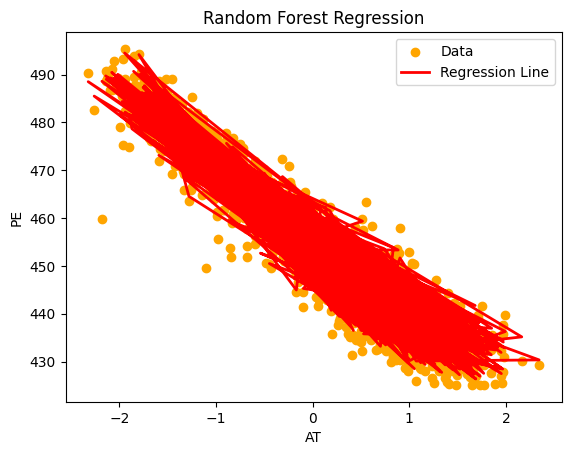

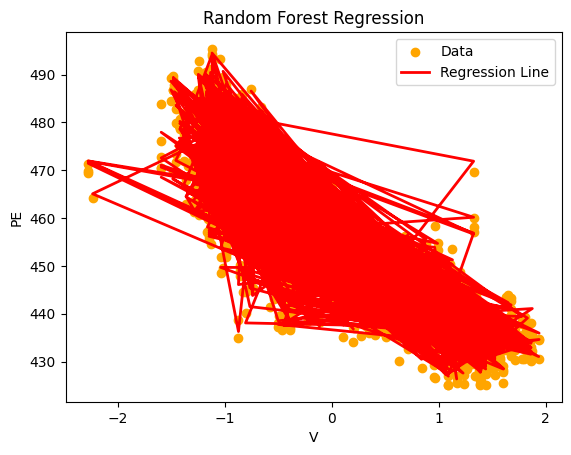

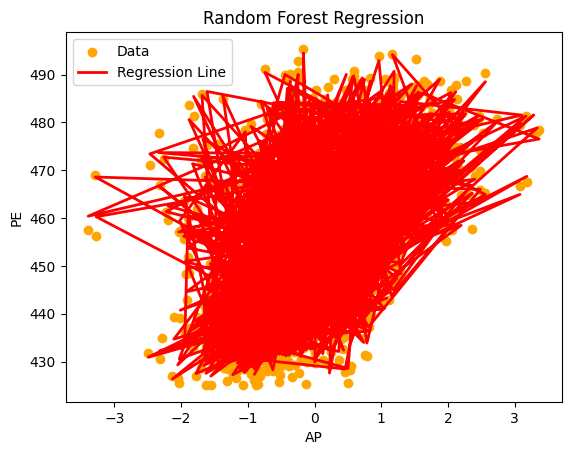

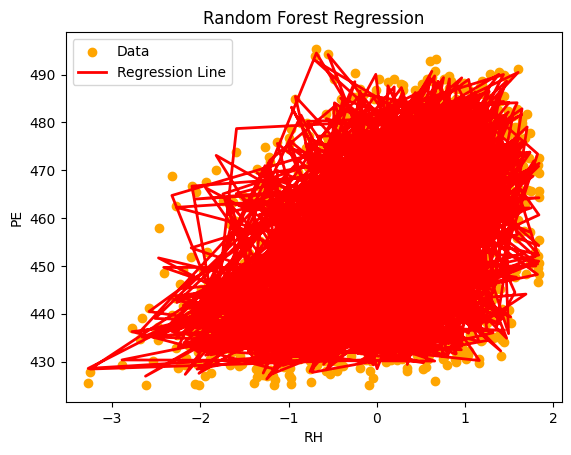

In [ ]:
for i in np.arange(df.columns.shape[0] - 1) :
  plt.scatter(X_test[:,i] , y_test , color='orange' , label='Data')
  plt.plot(X_test[:,i] , y_pred , color='red' , linewidth=2 , label='Regression Line')
  plt.xlabel(df.columns[i])
  plt.ylabel(df.columns[-1])
  plt.title('Random Forest Regression')
  plt.legend()
  plt.show()